In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt
# from matplotlib import rcParams

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = ['Times New Roman']
# rcParams['font.size'] = 18

# load the dataset
path = 'results.csv'
data = read_csv(path)

data.head()

,start,ocrPerformed,textInserted,wordSplit,end
0,1686324160508386,1686324162537263,1686324162546416,1686324163737833,1686324163990930
1,1686324163996661,1686324165998989,1686324166018628,1686324167247782,1686324167687828
2,1686324167688703,1686324169673214,1686324169692745,1686324170874725,1686324171170203
3,1686324171170714,1686324173172184,1686324173190707,1686324174447020,1686324174763100
4,1686324174763707,1686324176735358,1686324176750924,1686324177899612,1686324178167377


In [2]:
# normalize timestamps

data['end'] -= data['wordSplit']
data['wordSplit'] -= data['textInserted']
data['textInserted'] -= data['ocrPerformed']
data['ocrPerformed'] -= data['start']

data['start'] *= 0

data.head()

,start,ocrPerformed,textInserted,wordSplit,end
0,0,2028877,9153,1191417,253097
1,0,2002328,19639,1229154,440046
2,0,1984511,19531,1181980,295478
3,0,2001470,18523,1256313,316080
4,0,1971651,15566,1148688,267765


In [3]:
# populate results for bar chart

chart_data = {
    'OCR': data['ocrPerformed'].mean(),
    'вставка\nтекста': data['textInserted'].mean(),
    'разбиение\nна слова': data['wordSplit'].mean(),
    'Вставка\nслов': data['end'].mean(),
}

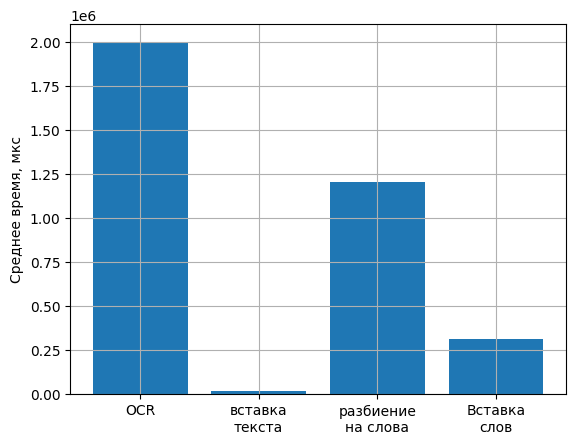

In [4]:
# plot the results

fig, ax = plt.subplots()
ax.bar(chart_data.keys(), chart_data.values())
ax.set_ylabel('Среднее время, мкс')
plt.grid()

plt.savefig('research.pdf', bbox_inches='tight')
plt.show()